# Deep Learning

In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(42)

X = np.array([[100, 2], [150, 3], [200, 4], [250, 4], [300, 5]])
y = np.array([250, 350, 480, 550, 650])

In [4]:
X_media = np.mean(X, axis = 0)
X_desv = np.std(X, axis = 0)
X_norm = (X - X_media) / X_desv

y_media = np.mean(y)
y_desv = np.std(y)
y_norm = (y - y_media) / y_desv

print(f'Caracteristicas normalizadas: {X_norm}')
print(f'Precios normalizados: {y_norm}')

Caracteristicas normalizadas: [[-1.41421356 -1.56892908]
 [-0.70710678 -0.58834841]
 [ 0.          0.39223227]
 [ 0.70710678  0.39223227]
 [ 1.41421356  1.37281295]]
Precios normalizados: [-1.45142421 -0.74684935  0.16909797  0.66230037  1.36687523]


In [6]:
model_seq = Sequential()
model_seq.add(Dense(units = 1, input_dim = 2, activation = None))
model_seq.compile(optimizer = 'adam', loss = 'mean_squared_error')
model_seq.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model_seq.fit(X_norm, y_norm, epochs = 100, verbose = 0)

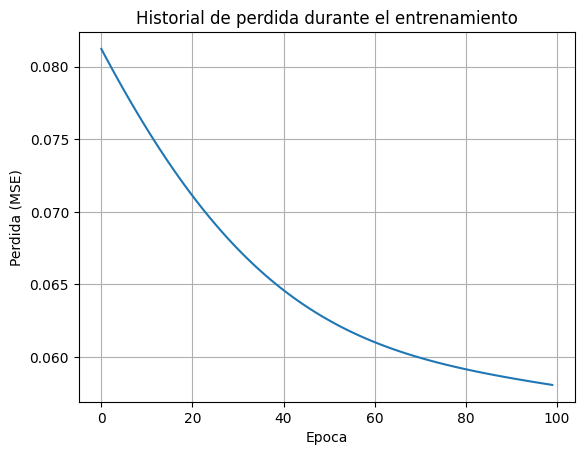

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Historial de perdida durante el entrenamiento')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.grid()
plt.show()

In [11]:
nueva_casa = np.array([[180, 3]])
nueva_casa_norm = (nueva_casa - X_media) / X_desv

precio_pred_norm = model_seq.predict(nueva_casa_norm, verbose = 0)
precio_pred = (precio_pred_norm * y_desv) + y_media
print(f'Precio para una cosas de 180 m^2 y 3 habitaciones: {precio_pred[0][0]:.2f}')

Precio para una cosas de 180 m^2 y 3 habitaciones: 359.91


In [13]:
model_deep = Sequential()
model_deep.add(Dense(units = 64, input_dim = 2, activation = 'relu')) #Capa de entrada y primera capa oculta
model_deep.add(Dense(units = 32, activation = 'relu')) #Segunda capa oculta
model_deep.add(Dense(units = 16, activation = 'relu')) #Tercera capa oculta
model_deep.add(Dense(units = 1, activation = None)) #Capa de salida

model_deep.compile(optimizer = 'adam', loss = 'mean_squared_error')

model_deep.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

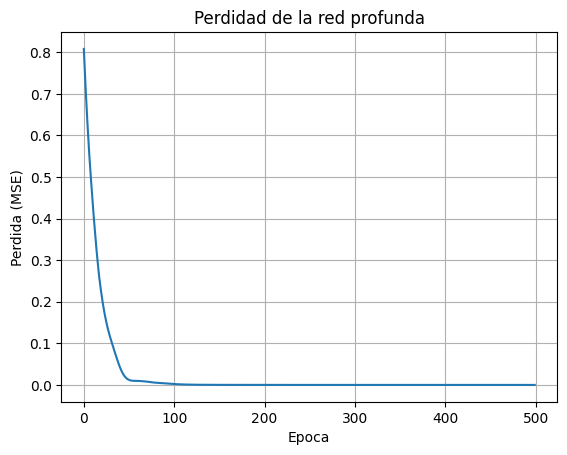

In [14]:
history_deep = model_deep.fit(X_norm, y_norm, epochs = 500, verbose = 0)

plt.plot(history_deep.history['loss'])
plt.title('Perdidad de la red profunda')
plt.xlabel('Epoca')
plt.ylabel('Perdida (MSE)')
plt.grid()
plt.show()